In [1]:
import rdflib
import pandas as pd

### Load data in memory

In [2]:
# Initiate an in memory graph
g = rdflib.Graph()
# Uncomment the line below to load the MAS4AI Generic model (ontology)
# g.parse('../../MAS4AI_GenericModel.ttl', format='turtle');

In [3]:
# Read and run update query from file
with open('insert_example_VW.ru') as f:
    g.update(f.read())

### Simple query
Find agent who has the skill required for a certain task.

In [4]:
# Define and execute the query
result = g.query('''
PREFIX mas4ai: <http://example.org/MAS4AI_GenericModel#>
PREFIX vw: <http://mas4ai.eu/def/vw/>

SELECT DISTINCT ?agent
WHERE {
    ?task a mas4ai:Task ;
        rdfs:label "Task_AB_UB_UBVLA" ;
        mas4ai:requiresSkill ?skill .

    ?agent mas4ai:hasSkill ?skill .
}
''')

# Convert results to Pandas DataFrame
df = pd.DataFrame(result.bindings)
df.applymap(lambda x: x)

,agent
0,http://mas4ai.eu/id/vw/UBclipAgent1


### Visualize all object properties

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph, rdflib_to_networkx_digraph

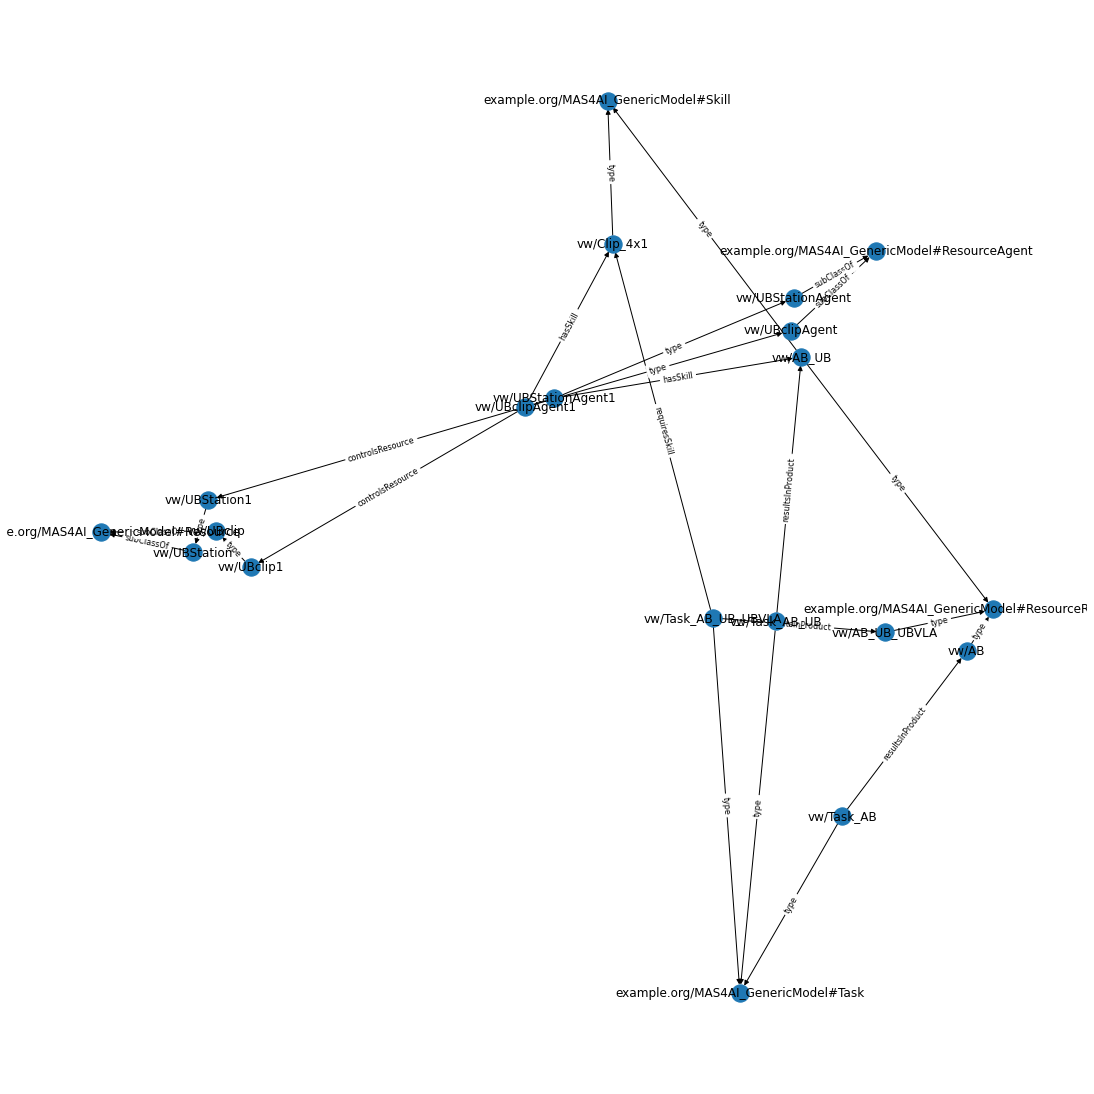

In [6]:
# Find all object property relations
result = g.query('''
PREFIX vw: <http://mas4ai.eu/def/vw/>

CONSTRUCT {
    ?s ?p ?o
}
WHERE {
    ?s ?p ?o
    FILTER( ?p != rdfs:label )
}
''')

# Convert to networkx directed graph
G = rdflib_to_networkx_digraph(result.graph)

# Add the edge labels
edge_labels = {}
for edge in G.edges():
    try:
        p = [i for i in result.graph.predicates(subject=edge[0], object=edge[1])][0].toPython().split('/')[-1].split('#')[-1]
    except:
        p = ''
    
    edge_labels[('/'.join(edge[0].split('/')[-2:]),'/'.join(edge[1].split('/')[-2:]))] = p

# Only show meaningful part of the URIs as node labels
G = nx.relabel_nodes(G, lambda x: '/'.join(x.split('/')[-2:]))

# Create figure
plt.figure(figsize=(15,15))
pos = nx.spring_layout(G, scale=2)
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8);